In [1]:
import numpy as np
import matplotlib.pyplot as plt
from axessettings import AxesSetting
import pandas as pd

## butterworth LPF

In [21]:
#L1: 59.58Ω  L2: 23.82Ω  C: 43.47nF  R: 516.762Ω 
def H(f):
    s = 1j*2*np.pi*f
    R = 516.762
    C = 43.47e-9
    L1 = 9.645e-3;  L2 = 4.7e-3
    ret = (R/(1+s*C*(s*L2+R)))/((1/(1/(s*L2+R)+s*C))+s*L1)
    return ret
gain_theory = lambda f: 20*np.log10(np.abs(H(f))) 
phase_theory = lambda f: np.angle(H(f), deg=True)
phase_theory_fix = lambda f: phase_theory(f) - 360*(phase_theory(f)>0)

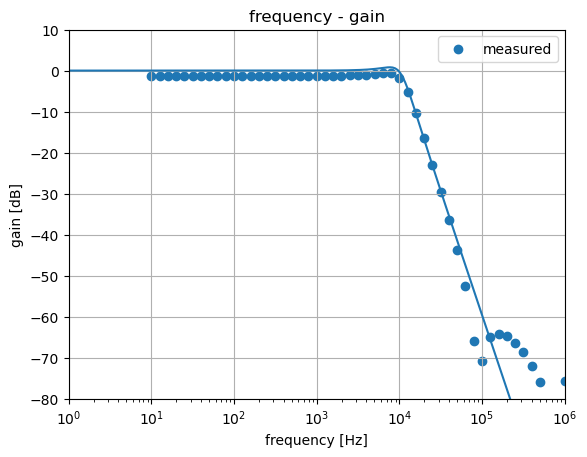

In [22]:
dat = pd.read_csv("4_bode_bw3lpf.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain [dB]", grid="both", xlim=(1,1e6),ylim=(-80,10),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_theory)
# axstg.plot_func(ax, gain_dB)
ax.scatter(dat["freq"], 20*np.log10(dat["gain"]), label="measured")
axstg.apply_axes(ax)

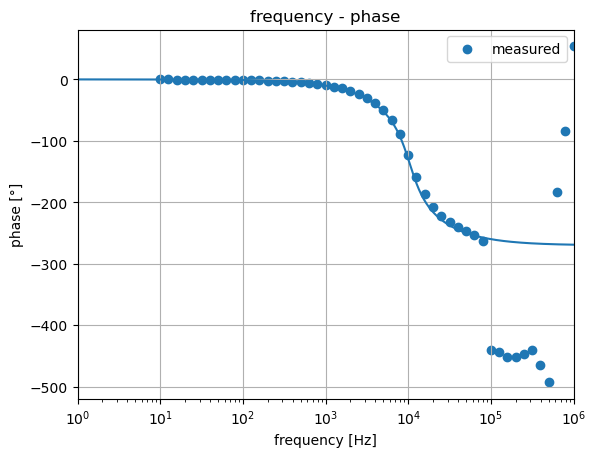

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase [°]", grid="both", xlim=(1,1e6),xscale="log", title="frequency - phase")
axstg.plot_func(ax, phase_theory_fix)
# axstg.plot_func(ax, gain_dB)
ax.scatter(dat["freq"], dat["phase"], label="measured")
axstg.apply_axes(ax)

## butterworth HPF

In [32]:
#L: 63.50Ω
def H(f):
    s = 1j*2*np.pi*f
    R = 862.32
    C1 = 9.179e-9
    C2 = 36.32e-9
    L = 10.203e-3
    ret = (R/(1+(R+1/(s*C2))/(s*L)))/(1/(1/(R+1/(s*C2))+1/(s*L))+1/(s*C1))
    return ret
gain_theory = lambda f: 20*np.log10(np.abs(H(f)))
phase_theory = lambda f: np.angle(H(f), deg=True)
phase_theory_fix = lambda f: phase_theory(f) + 360*(phase_theory(f)<0)

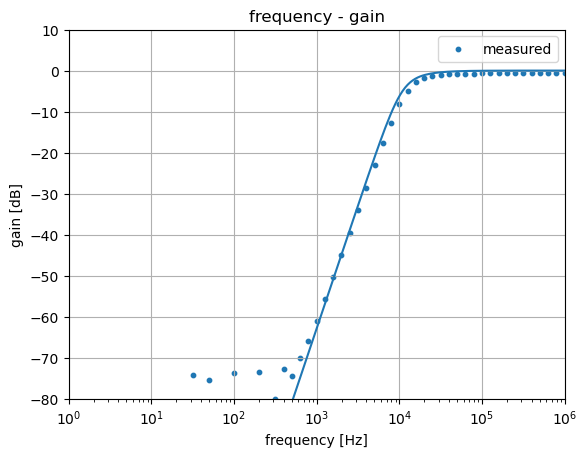

In [36]:
dat = pd.read_csv("4_bode_bw3hpf.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain [dB]", grid="both", xlim=(1,1e6),ylim=(-80,10),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_theory)
# axstg.plot_func(ax, gain_dB)
ax.scatter(dat["freq"], 20*np.log10(dat["gain"]), label="measured",s=10)
axstg.apply_axes(ax)

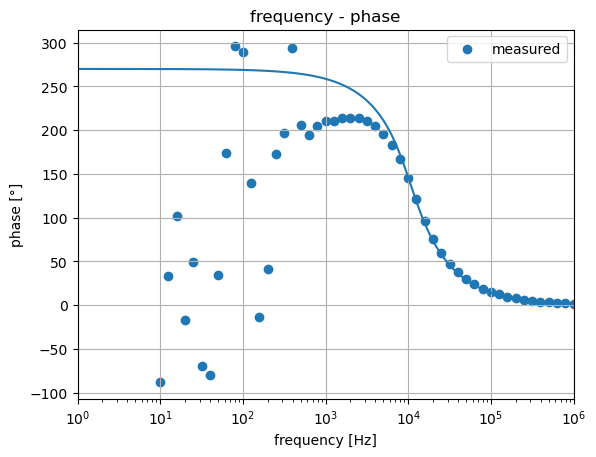

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase [°]", grid="both", xlim=(1,1e6),xscale="log", title="frequency - phase")
axstg.plot_func(ax, phase_theory_fix)
# axstg.plot_func(ax, gain_dB)
ax.scatter(dat["freq"], dat["phase"], label="measured")
axstg.apply_axes(ax)

## Chebichev LPF

In [53]:
# L1: 5.13Ω  L2: 23.64+5m+5.13Ω
def H(f):
    s = 1j*2*np.pi*f
    R = 906.85
    C = 4.414e-9
    L1 = 4.676e-3;  L2 = 2.8361e-3
    ret = (R/(1+s*C*(s*L2+R)))/((1/(1/(s*L2+R)+s*C))+s*L1)
    return ret
gain_theory = lambda f: 20*np.log10(np.abs(H(f))) 
phase_theory = lambda f: np.angle(H(f), deg=True)
phase_theory_fix = lambda f: phase_theory(f) - 360*(phase_theory(f)>0)

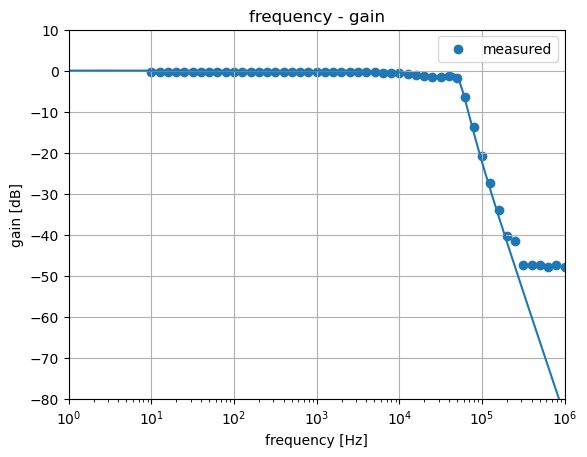

In [54]:
dat = pd.read_csv("4_bode_cheblpf_re.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain [dB]", grid="both", xlim=(1,1e6),ylim=(-80,10),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_theory)
# axstg.plot_func(ax, gain_dB)
ax.scatter(dat["freq"], 20*np.log10(dat["gain"]), label="measured")
axstg.apply_axes(ax)

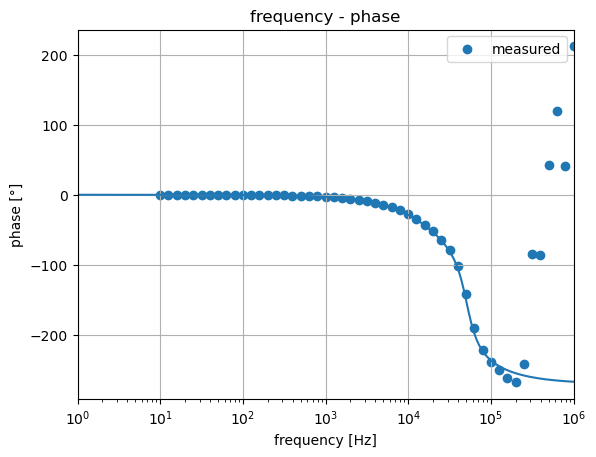

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase [°]", grid="both", xlim=(1,1e6),xscale="log", title="frequency - phase")
axstg.plot_func(ax, phase_theory_fix)
# axstg.plot_func(ax, gain_dB)
ax.scatter(dat["freq"], dat["phase"], label="measured")
axstg.apply_axes(ax)

## Chebichev HPF

In [50]:
# L: 58.80Ω
def H(f):
    s = 1j*2*np.pi*f
    R = 606.6
    C1 = 21.01e-9
    C2 = 31.53e-9
    L = 9.984e-3
    ret = (R/(1+(R+1/(s*C2))/(s*L)))/(1/(1/(R+1/(s*C2))+1/(s*L))+1/(s*C1))
    return ret
gain_theory = lambda f: 20*np.log10(np.abs(H(f)))
phase_theory = lambda f: np.angle(H(f), deg=True)
phase_theory_fix = lambda f: phase_theory(f) + 360*(phase_theory(f)<0)

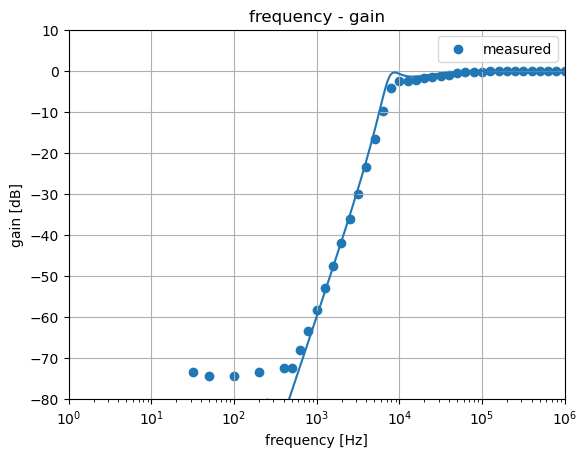

In [51]:
dat = pd.read_csv("4_bode_chebhpf.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain [dB]", grid="both", xlim=(1,1e6),ylim=(-80,10),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_theory)
# axstg.plot_func(ax, gain_dB)
ax.scatter(dat["freq"], 20*np.log10(dat["gain"]), label="measured")
axstg.apply_axes(ax)

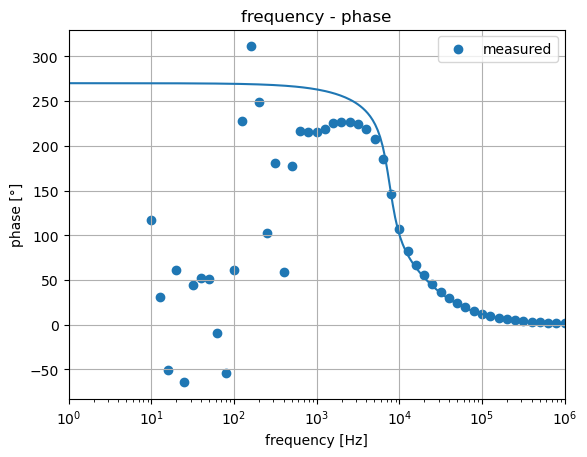

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase [°]", grid="both", xlim=(1,1e6),xscale="log", title="frequency - phase")
axstg.plot_func(ax, phase_theory_fix)
# axstg.plot_func(ax, gain_dB)
ax.scatter(dat["freq"], dat["phase"], label="measured")
axstg.apply_axes(ax)